# Betting Strategy Comparison

This notebook compares three common betting strategies under identical conditions:

- Simple (flat) betting
- Martingale betting
- D’Alembert betting

Each strategy is evaluated using Monte Carlo simulation to assess:
- Probability of ruin
- Distribution of final bankroll values
- Mean and median outcomes

All simulations are performed using the same parameters and random seed to ensure a fair comparison.

In [1]:
import sys
import os
import random
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.abspath(".."))
sys.path.insert(0, os.path.abspath("../src"))

from src.rng import roulette_like_trial
from src.strategies.simple import simple_bettor
from src.strategies.martingale import martingale_bettor
from src.strategies.dalembert import dalembert_bettor
from src.runner import run_simulation

plt.style.use("seaborn-v0_8-darkgrid")
random.seed(42)

## 1. Simulation Parameters

All strategies are evaluated under the same conditions.

In [2]:
initial_funds = 10_000
stake = 100
n_rounds = 100
n_bettors = 1000
p_win = 0.49
seed = 42

## 2. Monte Carlo Simulations

Each strategy is simulated independently using identical parameters and random seeds.

In [3]:
results = {}

results["Simple"] = run_simulation(
    simple_bettor,
    initial_funds,
    stake,
    n_rounds,
    n_bettors,
    p_win=p_win,
    seed=seed
)

results["Martingale"] = run_simulation(
    martingale_bettor,
    initial_funds,
    stake,
    n_rounds,
    n_bettors,
    p_win=p_win,
    seed=seed
)

results["D’Alembert"] = run_simulation(
    dalembert_bettor,
    initial_funds,
    stake,
    n_rounds,
    n_bettors,
    p_win=p_win,
    seed=seed
)

## 3. Summary Statistics

The table below reports ruin rates and summary statistics for each strategy.

In [4]:
summary = {}

for name, (final_values, broke_count) in results.items():
    summary[name] = {
        "Broke Rate (%)": round(broke_count / n_bettors * 100, 2),
        "Mean Final Wealth": round(np.mean(final_values), 2),
        "Median Final Wealth": round(np.median(final_values), 2)
    }

summary

{'Simple': {'Broke Rate (%)': 0.0,
  'Mean Final Wealth': np.float64(9788.2),
  'Median Final Wealth': np.float64(9800.0)},
 'Martingale': {'Broke Rate (%)': 31.7,
  'Mean Final Wealth': np.float64(9294.8),
  'Median Final Wealth': np.float64(14000.0)},
 'D’Alembert': {'Broke Rate (%)': 24.6,
  'Mean Final Wealth': np.float64(9012.7),
  'Median Final Wealth': np.float64(11250.0)}}

## 4. Distribution Comparison

Histograms of final wealth are plotted side-by-side to highlight differences in risk and outcome dispersion.

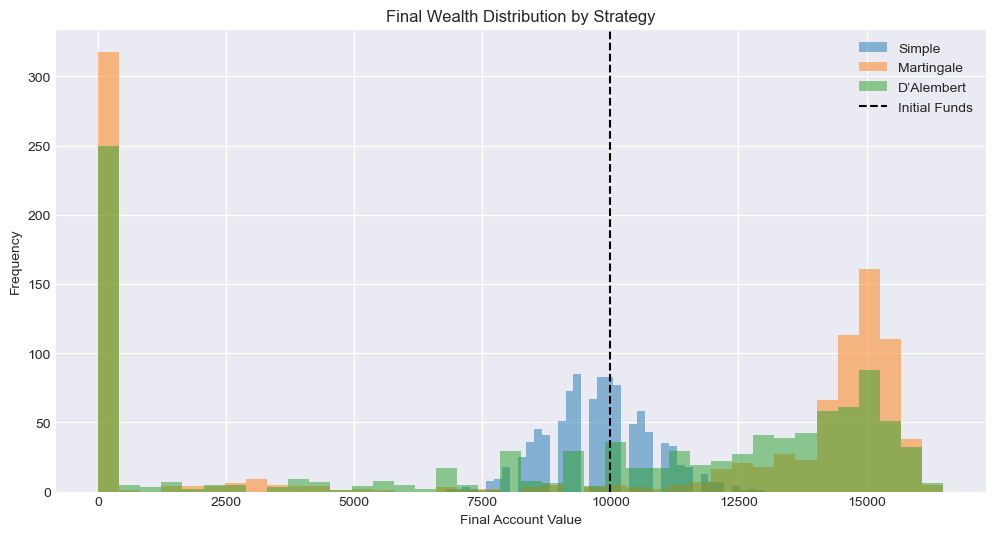

In [5]:
plt.figure(figsize=(12,6))

bins = 40

for name, (final_values, _) in results.items():
    plt.hist(final_values, bins=bins, alpha=0.5, label=name)

plt.axvline(initial_funds, color="black", linestyle="--", label="Initial Funds")
plt.title("Final Wealth Distribution by Strategy")
plt.xlabel("Final Account Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Interpretation

- The simple betting strategy produces the narrowest distribution but exhibits steady capital erosion.
- The Martingale strategy shows a highly skewed distribution with a high probability of ruin and a small number of extreme gains.
- The D’Alembert strategy lies between the two, reducing variance relative to Martingale while remaining exposed to long-term losses.

Across all strategies, the expected value remains negative, reflecting the underlying house edge of the game.

## Summary

- No betting strategy alters the expected value of a game with a house edge.
- Risk profiles differ substantially across strategies.
- Strategies that reduce variance do so at the cost of slower capital growth.
- Aggressive loss-recovery systems increase the probability of catastrophic loss.

This comparison reinforces the gambler’s ruin principle and highlights the distinction between volatility management and expected return.